### Importaciones

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, exp, sin, pi, tan

### Definicion de la funcion

Nuestra funcion por defecto es $f(t,x) = x$  
( Más adelante veremos que podemos cambiar la función si se requiere)

In [70]:
def funcion_f(ecuacion:str="x"):
    function = sp.sympify(ecuacion)
    return function

*Digite el numero de iteraciones deseadas:*

In [71]:
numero_iteraciones = 4

*Digite el valor inicial en t:*

In [72]:
paso_inicial_T = -0.4

*Digite el valor final en t:*

In [73]:
paso_final_T = 0.4

*Digite la condicion inicial de $x(t)$:*

In [74]:
paso_inicial_X = 1.384868848732684

*A continuación calcularemos el $\Delta t$*

In [75]:
delta_T = (paso_final_T - paso_inicial_T)/numero_iteraciones
delta_T

0.2

### Iniciemos con la solucion exacta

In [76]:
# Definir la variable independiente 
t = symbols('t')

# Esta es una funcion que depende de t
x = Function('x')(t)

#funcion_m = sin(t)
funcion_m = (2*t*(1+x**2))
#funcion_m = x
# Definir la ecuación diferencial (Homogenea)
edo = x.diff(t) - funcion_m
# Resolver la ecuación diferencial y darle su valor inicial

solucion = dsolve(edo, x, ics={x.subs(t, 0): 1})
solucion

Eq(x(t), tan(t**2 + pi/4))

In [77]:
# Creamos una lista con un solo elemento de nuestro valore inicial de t
vector_T_funcion_real = np.array([paso_inicial_T])
        
# Iteramos para crear el vector para realizar la graficación de la funcion exacta
for iteracion in range(numero_iteraciones*10):
    t_i = (vector_T_funcion_real[iteracion] + delta_T/ 10) 
    vector_T_funcion_real = np.append(vector_T_funcion_real, t_i)

# Evaluamos la función en cada valor de tiempo y almacenamos los resultados en una lista
vector_f_solucion = [solucion.rhs.subs({t: valor}) for valor in list(vector_T_funcion_real)]

In [78]:
vector_f_solucion

[tan(0.16 + pi/4),
 tan(0.1444 + pi/4),
 tan(0.1296 + pi/4),
 tan(0.1156 + pi/4),
 tan(0.1024 + pi/4),
 tan(0.09 + pi/4),
 tan(0.0784 + pi/4),
 tan(0.0676 + pi/4),
 tan(0.0576 + pi/4),
 tan(0.0484 + pi/4),
 tan(0.04 + pi/4),
 tan(0.0324 + pi/4),
 tan(0.0256 + pi/4),
 tan(0.0196 + pi/4),
 tan(0.0144 + pi/4),
 tan(0.00999999999999999 + pi/4),
 tan(0.00639999999999999 + pi/4),
 tan(0.00359999999999999 + pi/4),
 tan(0.0016 + pi/4),
 tan(0.000399999999999998 + pi/4),
 tan(3.90000813738415e-33 + pi/4),
 tan(0.000400000000000003 + pi/4),
 tan(0.00160000000000001 + pi/4),
 tan(0.00360000000000001 + pi/4),
 tan(0.00640000000000001 + pi/4),
 tan(0.01 + pi/4),
 tan(0.0144 + pi/4),
 tan(0.0196 + pi/4),
 tan(0.0256 + pi/4),
 tan(0.0324 + pi/4),
 tan(0.04 + pi/4),
 tan(0.0484 + pi/4),
 tan(0.0576 + pi/4),
 tan(0.0676 + pi/4),
 tan(0.0784 + pi/4),
 tan(0.09 + pi/4),
 tan(0.1024 + pi/4),
 tan(0.1156 + pi/4),
 tan(0.1296 + pi/4),
 tan(0.1444 + pi/4),
 tan(0.16 + pi/4)]

### Definición de las variables simbolicas

In [79]:
t, x = sp.symbols('t x')

In [80]:
fun = "(2*t*(1+x**2))"

Creamos la funcion programatica $f$  
Como parametro tenemos la funcion que creamos, si no le pasamos este parametro usa nuestra funcion por defecto

In [81]:
func_f = funcion_f(fun)
func_f

2*t*(x**2 + 1)

## Metodo de Euler

$x_{k+1} = x_{k} + f(t_{k},x_{k})\Delta t$

In [82]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_euler = np.array([paso_inicial_T])
vector_X_euler = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_evaluar = {
        t: vector_T_euler[iteracion],
        x: vector_X_euler[iteracion]
    }
    t_i = vector_T_euler[iteracion] + delta_T
    x_i = vector_X_euler[iteracion] + func_f.subs(dic_evaluar) * delta_T

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_T_euler = np.append(vector_T_euler, t_i)
    vector_X_euler = np.append(vector_X_euler, x_i)

### Grafiquemos

## Metodo de Runge-Kutta (Euler de cuarto orden)

$x_{k+1} = x_{k} + (\frac{m_{k} + 2n_{k} + 2p_{k} + q_{k}}{6})\Delta t $

Definamos $m_{k} , n_{k} , p_{k} , q_{k}$

$m_{k} = f(t_{k},x_{k})$

$n_{k} = f(t_{k} + \frac{\Delta t}{2}, y_{k} )$  donde  $y_{k} = x_{k} + m_{k} \frac{\Delta t}{2}$

$p_{k} = f(t_{k} + \frac{\Delta t}{2}, z_{k} )$  donde  $z_{k} = x_{k} + n_{k}\frac{\Delta t}{2}$

$q_{k} = f(t_{k+1}, w_{k})$  donde  $w_{k} = x_{k} + p_{k}\Delta t$

In [83]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk = np.array([paso_inicial_T])
vector_X_rk = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_eval_rk_m = {
        t: vector_T_rk[iteracion],
        x: vector_X_rk[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m)

    dic_eval_rk_n = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + m_i * (delta_T/2)
    }
    n_i = func_f.subs(dic_eval_rk_n)
    
    dic_eval_rk_p = {
        t: vector_T_rk[iteracion] + (delta_T/2),
        x: vector_X_rk[iteracion] + n_i * (delta_T/2)
    }
    p_i = func_f.subs(dic_eval_rk_p)

    t_i = vector_T_rk[iteracion] + delta_T
    vector_T_rk = np.append(vector_T_rk, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk[iteracion + 1] + (delta_T/2),
        x: vector_X_rk[iteracion] + p_i * (delta_T)
    }
    q_i = func_f.subs(dic_eval_rk_q)

    x_i = vector_X_rk[iteracion] + (delta_T/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk = np.append(vector_X_rk, x_i)

### Si requiere ver los vectores resultantes basta expandir y correr las siguientes celdas

In [84]:
len(vector_T_rk)

5

In [86]:
len(vector_f_solucion)

41

### Grafiquemos

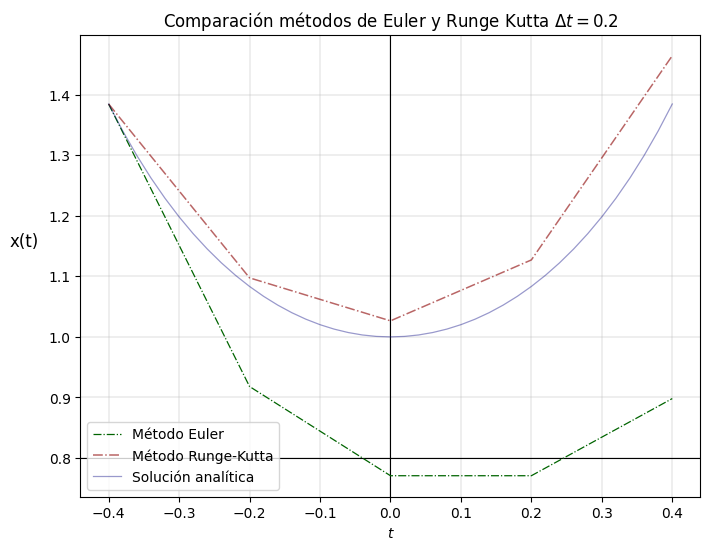

In [87]:
plt.figure(figsize=(8, 6))
plt.text(-0.54, 1.15, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(-0.5, 0.5, 0.1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(0, 7, 0.1))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0.8, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vector_T_euler,
    vector_X_euler,
    label="Método Euler",
    color='darkgreen',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk,
    vector_X_rk,
    label="Método Runge-Kutta",
    color='darkred',
    linestyle='-.',
    alpha = 0.6,
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real,
    vector_f_solucion,
    label="Solución analítica",
    color='navy',
    linestyle='-',
    alpha = 0.4,
    linewidth=0.9,
    markersize=12, 
)
plt.legend()  # Esto coloca la leyenda en la esquina superior izquierda
plt.title("Comparación métodos de Euler y Runge Kutta $\Delta t = 0.2$")
plt.savefig("Comparación métodos de Euler y Runge Kutta $\Delta t = 0.2$.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()